In [9]:
# Step 3
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta 

engine = create_engine("sqlite:///hawaii.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)

Measurements = Base.classes.measurements
Stations = Base.classes.stations

session = Session(engine)

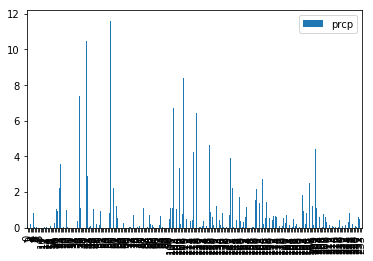

In [38]:
# Precipitation Analysis
x = session.query(Measurements.date, func.sum(Measurements.prcp)).group_by(Measurements.date).filter(Measurements.date > '2017-01-01').all()
df = pd.DataFrame(x, columns=['date', 'prcp'])

df.plot(kind='bar')
plt.show()

In [11]:
# Station Analysis
session.query(Stations.station).distinct().count()

9

In [12]:
session.query(Measurements.station, func.count(Measurements.date)).group_by(Measurements.station).all()

[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

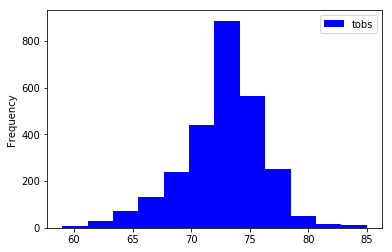

In [13]:
# station with the highest number of observations = USC00513117
x = session.query(Measurements.tobs).filter_by(station='USC00513117').all()
df = pd.DataFrame(x, columns=['tobs'])

df.plot(kind="hist", bins=12, color='blue')
plt.show()

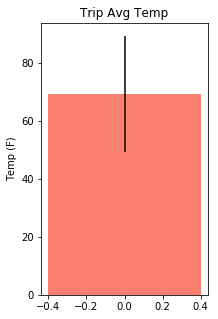

In [41]:
# Temperature Analysis
def calc_temps(start_date, end_date):
    s_date = datetime.strptime(start_date, '%Y-%m-%d') - timedelta(days=365.24)
    e_date = datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=365.24)
    
    result = session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs))\
    .filter(s_date < Measurements.date, Measurements.date < e_date).all()
    
    return result[0]

result = calc_temps("2018-01-01","2018-02-01")

min_tobs = result[0]
avg_tobs = result[1]
max_tobs = result[2]

plt.figure(figsize=(3,5))
plt.bar(0, avg_tobs, yerr=max_tobs-min_tobs, color="salmon")
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()